In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline

318703.3218630596


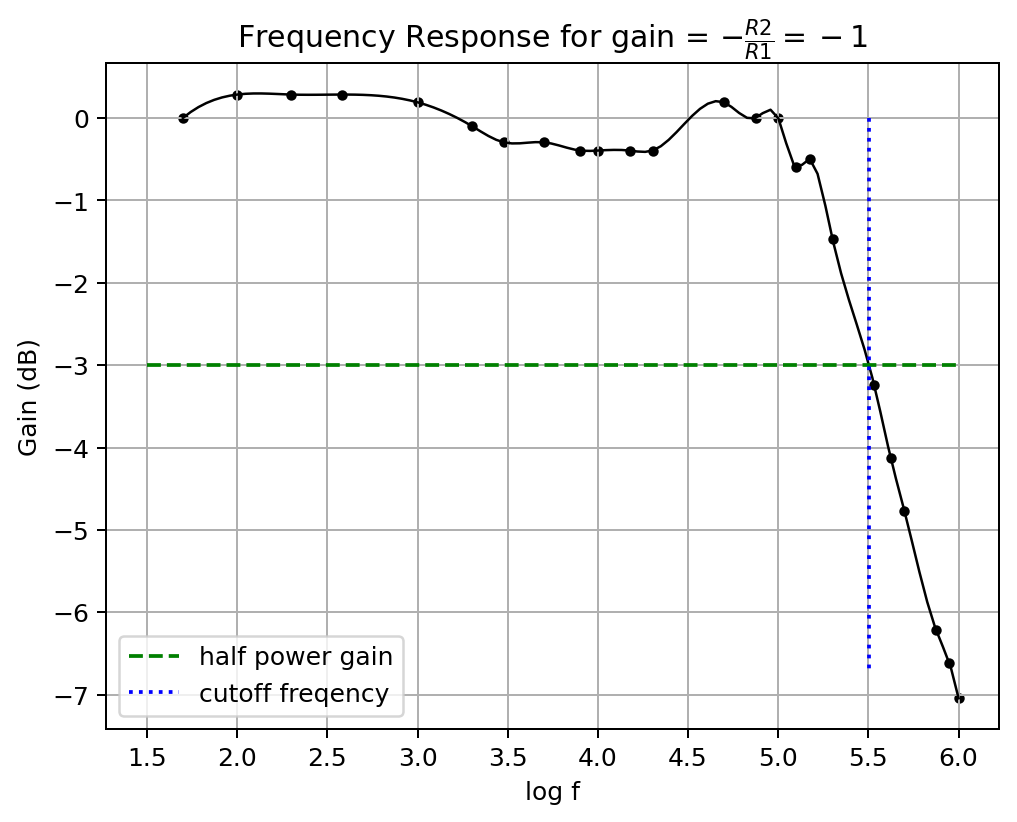

In [24]:
df1 = pd.read_csv('bode1.csv')
from scipy import interpolate

freq = df1['freq'].to_numpy()
logFreq = np.log10(freq)

involtage = 0.9
gaindB = 20 * np.log10(df1['out'].to_numpy()/involtage)

peak = gaindB.max()
cutoff_freq = interpolate.InterpolatedUnivariateSpline(logFreq, gaindB+3)
print(10**cutoff_freq.roots()[0])
fig, ax = plt.subplots(1,1,dpi=180)
ax.set_xlabel(r'log f')
ax.set_ylabel(r'Gain (dB)')
#ax.yaxis.tick_right()
ax.set_title(r'Frequency Response for gain = $-\frac{R2}{R1} = -1$')
ax.grid()
x_clean = logFreq
y_clean = gaindB
X_Y_Spline = make_interp_spline(x_clean, y_clean, k=3)

x = np.linspace(x_clean.min(), x_clean.max(), 100)
y = X_Y_Spline(x)

ax.plot(x,y, linewidth=1, color='k')
ax.set_xticks(np.linspace(1,7,13))
ax.scatter(logFreq,gaindB, color='k', marker='o',sizes=[10])
ax.hlines(-3, 1.5, 6, linestyles='dashed', colors='green', label='half power gain')
ax.vlines(cutoff_freq.roots(), 0, peak-7, linestyles='dotted', colors='blue', label='cutoff freqency')
ax.legend()
fig.savefig('bode1.jpeg', bbox_inches="tight")
plt.show()
plt.close()


23440.986516609508


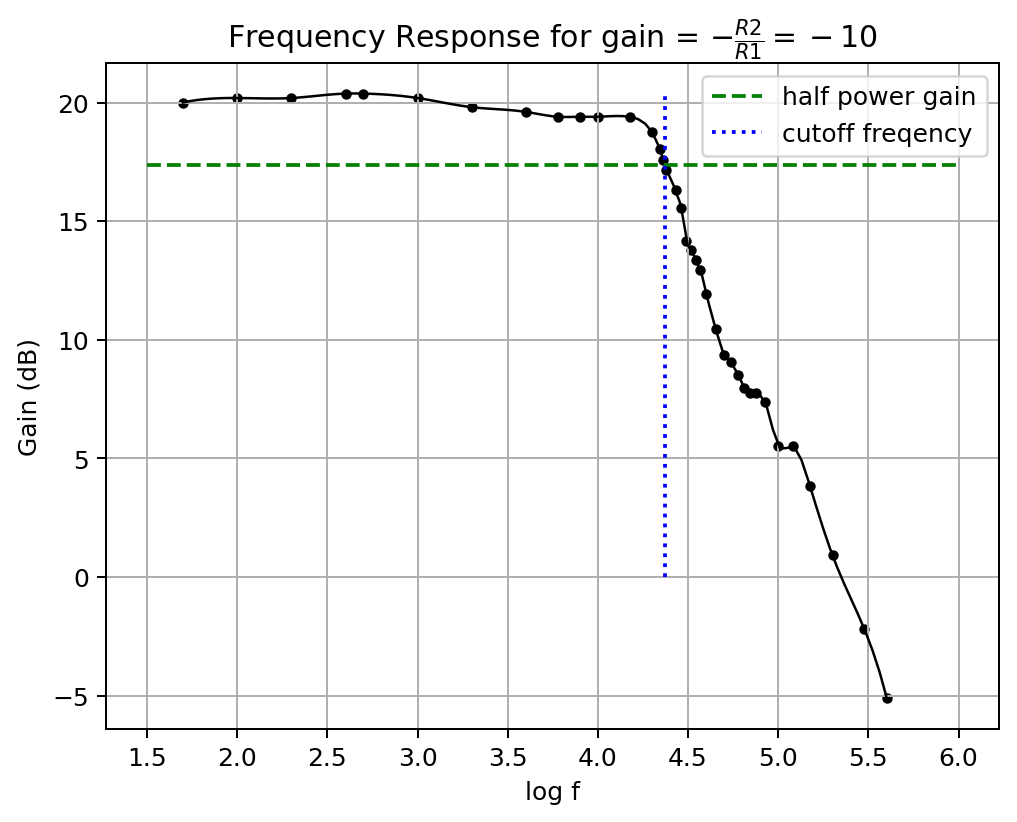

In [32]:
df1 = pd.read_csv('bode10.csv')
from scipy import interpolate

freq = df1['freq'].to_numpy()
logFreq = np.log10(freq)

involtage = 0.9
gaindB = 20 * np.log10(df1['out'].to_numpy()/involtage)

peak = gaindB.max()
cutoff_freq = interpolate.InterpolatedUnivariateSpline(logFreq, gaindB -(peak-3))
print(10**cutoff_freq.roots()[0])
fig, ax = plt.subplots(1,1,dpi=180)
ax.set_xlabel(r'log f')
ax.set_ylabel(r'Gain (dB)')
#ax.yaxis.tick_right()
ax.set_title(r'Frequency Response for gain = $-\frac{R2}{R1} = -10$')
ax.grid()
x_clean = logFreq
y_clean = gaindB
X_Y_Spline = make_interp_spline(x_clean, y_clean, k=3)

x = np.linspace(x_clean.min(), x_clean.max(), 100)
y = X_Y_Spline(x)

ax.plot(x,y, linewidth=1, color='k')
ax.set_xticks(np.linspace(1,7,13))
ax.scatter(logFreq,gaindB, color='k', marker='o',sizes=[10])
ax.hlines(peak-3, 1.5, 6, linestyles='dashed', colors='green', label='half power gain')
ax.vlines(cutoff_freq.roots(), 0, peak, linestyles='dotted', colors='blue', label='cutoff freqency')
ax.legend()
fig.savefig('bode10.jpeg', bbox_inches="tight")
plt.show()
plt.close()
